### Section 0: Import

In [1]:
from pysb import *
from pysb.bng import generate_network, generate_equations
from pysb.export import export
from pysb.simulator import BngSimulator, KappaSimulator
from pysb.pathfinder import set_path

import seaborn
import matplotlib.pyplot as plt
from pylab import linspace, plot, xlabel, ylabel, show

palette = seaborn.color_palette('colorblind')
set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')
set_path('kasim', '/opt/git-repositories/KaSim4.Kappa-Dev/')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

### Section 1: Define Model

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f12d505a0b8>

In [3]:
# Define model components
Monomer('met', ['name', 'loc', 'prot'], 
    { 'name' : ['ADP', 'ATP', 'CPD_3564', 'D_RIBULOSE', 'D_RIBULOSE_1_P', 'DIHYDROXY_ACETONE_PHOSPHATE', 
                'ETR_Quinols', 'ETR_Quinones', 'FUCULOSE_1P', 'GLYCOL', 'GLYCOLALDEHYDE', 'GLYCOLLATE', 
                'L_FUCULOSE', 'L_LACTATE', 'LACTALD', 'NAD', 'NADH', 'PROPANE_1_2_DIOL', 'PROTON', 
                'PYRUVATE', 'WATER', '_2_OXOBUTANOATE', 'alpha_D_arabinofuranose', 'alpha_D_arabinopyranose', 
                'alpha_L_fucopyranose', 'alpha_L_galactopyranose', 'beta_D_arabinofuranose', 
                'beta_D_arabinopyranose', 'beta_L_fucopyranose', 'beta_L_galactopyranose', 'FMN'], 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('dna', ['name', 'type', 'prot', 'rna', 'up', 'dw'], 
    { 'name' : ['fucP', 'fucU', 'fucI', 'fucK', 'fucA', 'fucO', 'aldA', 'lldD', 'fucR', 'lldP', 'lldR'], 
      'type' : ['BS', 'pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('rna', ['name', 'type', 'dna', 'prot'], 
    { 'name' : ['fucP', 'fucU', 'fucI', 'fucK', 'fucA', 'fucO', 'aldA', 'lldD', 'fucR', 'lldP', 'lldR'], 
      'type' : ['BS', 'pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})

Monomer('prot', ['name', 'loc', 'dna', 'met', 'rna', 'up', 'dw'],
    { 'name' : ['fucP', 'fucU', 'fucI', 'fucK', 'fucA', 'fucO', 'aldA', 'lldD', 'fucR', 'lldP', 'lldR'], 
      'loc' : ['cyt', 'per', 'ex']})

Monomer('cplx', ['name', 'loc', 'dna', 'prot', 'rna'], 
    { 'name' : ['RNAP', 'Ribosome'],
      'loc' : ['cyt', 'per', 'ex']})

Monomer('cplx', ['name', 'loc', 'dna', 'prot', 'rna'], {'name': ['RNAP', 'Ribosome'], 'loc': ['cyt', 'per', 'ex']})

In [4]:
# Define observables and initials for metabolites
Observable('obs_ADP_cyt', met(name = 'ADP', loc = 'cyt', prot = None))
Observable('obs_ADP_per', met(name = 'ADP', loc = 'per', prot = None))
Observable('obs_ADP_ex', met(name = 'ADP', loc = 'ex', prot = None))
Observable('obs_ATP_cyt', met(name = 'ATP', loc = 'cyt', prot = None))
Observable('obs_ATP_per', met(name = 'ATP', loc = 'per', prot = None))
Observable('obs_ATP_ex', met(name = 'ATP', loc = 'ex', prot = None))
Observable('obs_CPD_3564_cyt', met(name = 'CPD_3564', loc = 'cyt', prot = None))
Observable('obs_CPD_3564_per', met(name = 'CPD_3564', loc = 'per', prot = None))
Observable('obs_CPD_3564_ex', met(name = 'CPD_3564', loc = 'ex', prot = None))
Observable('obs_D_RIBULOSE_cyt', met(name = 'D_RIBULOSE', loc = 'cyt', prot = None))
Observable('obs_D_RIBULOSE_per', met(name = 'D_RIBULOSE', loc = 'per', prot = None))
Observable('obs_D_RIBULOSE_ex', met(name = 'D_RIBULOSE', loc = 'ex', prot = None))
Observable('obs_D_RIBULOSE_1_P_cyt', met(name = 'D_RIBULOSE_1_P', loc = 'cyt', prot = None))
Observable('obs_D_RIBULOSE_1_P_per', met(name = 'D_RIBULOSE_1_P', loc = 'per', prot = None))
Observable('obs_D_RIBULOSE_1_P_ex', met(name = 'D_RIBULOSE_1_P', loc = 'ex', prot = None))
Observable('obs_DIHYDROXY_ACETONE_PHOSPHATE_cyt', met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'cyt', prot = None))
Observable('obs_DIHYDROXY_ACETONE_PHOSPHATE_per', met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'per', prot = None))
Observable('obs_DIHYDROXY_ACETONE_PHOSPHATE_ex', met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'ex', prot = None))
Observable('obs_ETR_Quinols_cyt', met(name = 'ETR_Quinols', loc = 'cyt', prot = None))
Observable('obs_ETR_Quinols_per', met(name = 'ETR_Quinols', loc = 'per', prot = None))
Observable('obs_ETR_Quinols_ex', met(name = 'ETR_Quinols', loc = 'ex', prot = None))
Observable('obs_ETR_Quinones_cyt', met(name = 'ETR_Quinones', loc = 'cyt', prot = None))
Observable('obs_ETR_Quinones_per', met(name = 'ETR_Quinones', loc = 'per', prot = None))
Observable('obs_ETR_Quinones_ex', met(name = 'ETR_Quinones', loc = 'ex', prot = None))
Observable('obs_FUCULOSE_1P_cyt', met(name = 'FUCULOSE_1P', loc = 'cyt', prot = None))
Observable('obs_FUCULOSE_1P_per', met(name = 'FUCULOSE_1P', loc = 'per', prot = None))
Observable('obs_FUCULOSE_1P_ex', met(name = 'FUCULOSE_1P', loc = 'ex', prot = None))
Observable('obs_GLYCOL_cyt', met(name = 'GLYCOL', loc = 'cyt', prot = None))
Observable('obs_GLYCOL_per', met(name = 'GLYCOL', loc = 'per', prot = None))
Observable('obs_GLYCOL_ex', met(name = 'GLYCOL', loc = 'ex', prot = None))
Observable('obs_GLYCOLALDEHYDE_cyt', met(name = 'GLYCOLALDEHYDE', loc = 'cyt', prot = None))
Observable('obs_GLYCOLALDEHYDE_per', met(name = 'GLYCOLALDEHYDE', loc = 'per', prot = None))
Observable('obs_GLYCOLALDEHYDE_ex', met(name = 'GLYCOLALDEHYDE', loc = 'ex', prot = None))
Observable('obs_GLYCOLLATE_cyt', met(name = 'GLYCOLLATE', loc = 'cyt', prot = None))
Observable('obs_GLYCOLLATE_per', met(name = 'GLYCOLLATE', loc = 'per', prot = None))
Observable('obs_GLYCOLLATE_ex', met(name = 'GLYCOLLATE', loc = 'ex', prot = None))
Observable('obs_L_FUCULOSE_cyt', met(name = 'L_FUCULOSE', loc = 'cyt', prot = None))
Observable('obs_L_FUCULOSE_per', met(name = 'L_FUCULOSE', loc = 'per', prot = None))
Observable('obs_L_FUCULOSE_ex', met(name = 'L_FUCULOSE', loc = 'ex', prot = None))
Observable('obs_L_LACTATE_cyt', met(name = 'L_LACTATE', loc = 'cyt', prot = None))
Observable('obs_L_LACTATE_per', met(name = 'L_LACTATE', loc = 'per', prot = None))
Observable('obs_L_LACTATE_ex', met(name = 'L_LACTATE', loc = 'ex', prot = None))
Observable('obs_LACTALD_cyt', met(name = 'LACTALD', loc = 'cyt', prot = None))
Observable('obs_LACTALD_per', met(name = 'LACTALD', loc = 'per', prot = None))
Observable('obs_LACTALD_ex', met(name = 'LACTALD', loc = 'ex', prot = None))
Observable('obs_NAD_cyt', met(name = 'NAD', loc = 'cyt', prot = None))
Observable('obs_NAD_per', met(name = 'NAD', loc = 'per', prot = None))
Observable('obs_NAD_ex', met(name = 'NAD', loc = 'ex', prot = None))
Observable('obs_NADH_cyt', met(name = 'NADH', loc = 'cyt', prot = None))
Observable('obs_NADH_per', met(name = 'NADH', loc = 'per', prot = None))
Observable('obs_NADH_ex', met(name = 'NADH', loc = 'ex', prot = None))
Observable('obs_PROPANE_1_2_DIOL_cyt', met(name = 'PROPANE_1_2_DIOL', loc = 'cyt', prot = None))
Observable('obs_PROPANE_1_2_DIOL_per', met(name = 'PROPANE_1_2_DIOL', loc = 'per', prot = None))
Observable('obs_PROPANE_1_2_DIOL_ex', met(name = 'PROPANE_1_2_DIOL', loc = 'ex', prot = None))
Observable('obs_PROTON_cyt', met(name = 'PROTON', loc = 'cyt', prot = None))
Observable('obs_PROTON_per', met(name = 'PROTON', loc = 'per', prot = None))
Observable('obs_PROTON_ex', met(name = 'PROTON', loc = 'ex', prot = None))
Observable('obs_PYRUVATE_cyt', met(name = 'PYRUVATE', loc = 'cyt', prot = None))
Observable('obs_PYRUVATE_per', met(name = 'PYRUVATE', loc = 'per', prot = None))
Observable('obs_PYRUVATE_ex', met(name = 'PYRUVATE', loc = 'ex', prot = None))
Observable('obs_WATER_cyt', met(name = 'WATER', loc = 'cyt', prot = None))
Observable('obs_WATER_per', met(name = 'WATER', loc = 'per', prot = None))
Observable('obs_WATER_ex', met(name = 'WATER', loc = 'ex', prot = None))
Observable('obs__2_OXOBUTANOATE_cyt', met(name = '_2_OXOBUTANOATE', loc = 'cyt', prot = None))
Observable('obs__2_OXOBUTANOATE_per', met(name = '_2_OXOBUTANOATE', loc = 'per', prot = None))
Observable('obs__2_OXOBUTANOATE_ex', met(name = '_2_OXOBUTANOATE', loc = 'ex', prot = None))
Observable('obs_alpha_D_arabinofuranose_cyt', met(name = 'alpha_D_arabinofuranose', loc = 'cyt', prot = None))
Observable('obs_alpha_D_arabinofuranose_per', met(name = 'alpha_D_arabinofuranose', loc = 'per', prot = None))
Observable('obs_alpha_D_arabinofuranose_ex', met(name = 'alpha_D_arabinofuranose', loc = 'ex', prot = None))
Observable('obs_alpha_D_arabinopyranose_cyt', met(name = 'alpha_D_arabinopyranose', loc = 'cyt', prot = None))
Observable('obs_alpha_D_arabinopyranose_per', met(name = 'alpha_D_arabinopyranose', loc = 'per', prot = None))
Observable('obs_alpha_D_arabinopyranose_ex', met(name = 'alpha_D_arabinopyranose', loc = 'ex', prot = None))
Observable('obs_alpha_L_fucopyranose_cyt', met(name = 'alpha_L_fucopyranose', loc = 'cyt', prot = None))
Observable('obs_alpha_L_fucopyranose_per', met(name = 'alpha_L_fucopyranose', loc = 'per', prot = None))
Observable('obs_alpha_L_fucopyranose_ex', met(name = 'alpha_L_fucopyranose', loc = 'ex', prot = None))
Observable('obs_alpha_L_galactopyranose_cyt', met(name = 'alpha_L_galactopyranose', loc = 'cyt', prot = None))
Observable('obs_alpha_L_galactopyranose_per', met(name = 'alpha_L_galactopyranose', loc = 'per', prot = None))
Observable('obs_alpha_L_galactopyranose_ex', met(name = 'alpha_L_galactopyranose', loc = 'ex', prot = None))
Observable('obs_beta_D_arabinofuranose_cyt', met(name = 'beta_D_arabinofuranose', loc = 'cyt', prot = None))
Observable('obs_beta_D_arabinofuranose_per', met(name = 'beta_D_arabinofuranose', loc = 'per', prot = None))
Observable('obs_beta_D_arabinofuranose_ex', met(name = 'beta_D_arabinofuranose', loc = 'ex', prot = None))
Observable('obs_beta_D_arabinopyranose_cyt', met(name = 'beta_D_arabinopyranose', loc = 'cyt', prot = None))
Observable('obs_beta_D_arabinopyranose_per', met(name = 'beta_D_arabinopyranose', loc = 'per', prot = None))
Observable('obs_beta_D_arabinopyranose_ex', met(name = 'beta_D_arabinopyranose', loc = 'ex', prot = None))
Observable('obs_beta_L_fucopyranose_cyt', met(name = 'beta_L_fucopyranose', loc = 'cyt', prot = None))
Observable('obs_beta_L_fucopyranose_per', met(name = 'beta_L_fucopyranose', loc = 'per', prot = None))
Observable('obs_beta_L_fucopyranose_ex', met(name = 'beta_L_fucopyranose', loc = 'ex', prot = None))
Observable('obs_beta_L_galactopyranose_cyt', met(name = 'beta_L_galactopyranose', loc = 'cyt', prot = None))
Observable('obs_beta_L_galactopyranose_per', met(name = 'beta_L_galactopyranose', loc = 'per', prot = None))
Observable('obs_beta_L_galactopyranose_ex', met(name = 'beta_L_galactopyranose', loc = 'ex', prot = None))

# Initial(met(name = 'ADP', loc = 'cyt', prot = None), Parameter('t0_ADP_cyt', 0))
# Initial(met(name = 'ADP', loc = 'per', prot = None), Parameter('t0_ADP_per', 0))
# Initial(met(name = 'ADP', loc = 'ex', prot = None), Parameter('t0_ADP_ex', 0))
Initial(met(name = 'ATP', loc = 'cyt', prot = None), Parameter('t0_ATP_cyt', 100))
# Initial(met(name = 'ATP', loc = 'per', prot = None), Parameter('t0_ATP_per', 0))
# Initial(met(name = 'ATP', loc = 'ex', prot = None), Parameter('t0_ATP_ex', 0))
# Initial(met(name = 'CPD_3564', loc = 'cyt', prot = None), Parameter('t0_CPD_3564_cyt', 0))
# Initial(met(name = 'CPD_3564', loc = 'per', prot = None), Parameter('t0_CPD_3564_per', 0))
# Initial(met(name = 'CPD_3564', loc = 'ex', prot = None), Parameter('t0_CPD_3564_ex', 0))
# Initial(met(name = 'D_RIBULOSE', loc = 'cyt', prot = None), Parameter('t0_D_RIBULOSE_cyt', 0))
# Initial(met(name = 'D_RIBULOSE', loc = 'per', prot = None), Parameter('t0_D_RIBULOSE_per', 0))
# Initial(met(name = 'D_RIBULOSE', loc = 'ex', prot = None), Parameter('t0_D_RIBULOSE_ex', 0))
# Initial(met(name = 'D_RIBULOSE_1_P', loc = 'cyt', prot = None), Parameter('t0_D_RIBULOSE_1_P_cyt', 0))
# Initial(met(name = 'D_RIBULOSE_1_P', loc = 'per', prot = None), Parameter('t0_D_RIBULOSE_1_P_per', 0))
# Initial(met(name = 'D_RIBULOSE_1_P', loc = 'ex', prot = None), Parameter('t0_D_RIBULOSE_1_P_ex', 0))
# Initial(met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'cyt', prot = None), Parameter('t0_DIHYDROXY_ACETONE_PHOSPHATE_cyt', 0))
# Initial(met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'per', prot = None), Parameter('t0_DIHYDROXY_ACETONE_PHOSPHATE_per', 0))
# Initial(met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'ex', prot = None), Parameter('t0_DIHYDROXY_ACETONE_PHOSPHATE_ex', 0))
# Initial(met(name = 'ETR_Quinols', loc = 'cyt', prot = None), Parameter('t0_ETR_Quinols_cyt', 0))
# Initial(met(name = 'ETR_Quinols', loc = 'per', prot = None), Parameter('t0_ETR_Quinols_per', 0))
# Initial(met(name = 'ETR_Quinols', loc = 'ex', prot = None), Parameter('t0_ETR_Quinols_ex', 0))
Initial(met(name = 'ETR_Quinones', loc = 'cyt', prot = None), Parameter('t0_ETR_Quinones_cyt', 100))
# Initial(met(name = 'ETR_Quinones', loc = 'per', prot = None), Parameter('t0_ETR_Quinones_per', 0))
# Initial(met(name = 'ETR_Quinones', loc = 'ex', prot = None), Parameter('t0_ETR_Quinones_ex', 0))
# Initial(met(name = 'FUCULOSE_1P', loc = 'cyt', prot = None), Parameter('t0_FUCULOSE_1P_cyt', 0))
# Initial(met(name = 'FUCULOSE_1P', loc = 'per', prot = None), Parameter('t0_FUCULOSE_1P_per', 0))
# Initial(met(name = 'FUCULOSE_1P', loc = 'ex', prot = None), Parameter('t0_FUCULOSE_1P_ex', 0))
# Initial(met(name = 'GLYCOL', loc = 'cyt', prot = None), Parameter('t0_GLYCOL_cyt', 0))
# Initial(met(name = 'GLYCOL', loc = 'per', prot = None), Parameter('t0_GLYCOL_per', 0))
# Initial(met(name = 'GLYCOL', loc = 'ex', prot = None), Parameter('t0_GLYCOL_ex', 0))
# Initial(met(name = 'GLYCOLALDEHYDE', loc = 'cyt', prot = None), Parameter('t0_GLYCOLALDEHYDE_cyt', 0))
# Initial(met(name = 'GLYCOLALDEHYDE', loc = 'per', prot = None), Parameter('t0_GLYCOLALDEHYDE_per', 0))
# Initial(met(name = 'GLYCOLALDEHYDE', loc = 'ex', prot = None), Parameter('t0_GLYCOLALDEHYDE_ex', 0))
# Initial(met(name = 'GLYCOLLATE', loc = 'cyt', prot = None), Parameter('t0_GLYCOLLATE_cyt', 0))
# Initial(met(name = 'GLYCOLLATE', loc = 'per', prot = None), Parameter('t0_GLYCOLLATE_per', 0))
# Initial(met(name = 'GLYCOLLATE', loc = 'ex', prot = None), Parameter('t0_GLYCOLLATE_ex', 0))
# Initial(met(name = 'L_FUCULOSE', loc = 'cyt', prot = None), Parameter('t0_L_FUCULOSE_cyt', 0))
# Initial(met(name = 'L_FUCULOSE', loc = 'per', prot = None), Parameter('t0_L_FUCULOSE_per', 0))
# Initial(met(name = 'L_FUCULOSE', loc = 'ex', prot = None), Parameter('t0_L_FUCULOSE_ex', 0))
# Initial(met(name = 'L_LACTATE', loc = 'cyt', prot = None), Parameter('t0_L_LACTATE_cyt', 0))
# Initial(met(name = 'L_LACTATE', loc = 'per', prot = None), Parameter('t0_L_LACTATE_per', 0))
# Initial(met(name = 'L_LACTATE', loc = 'ex', prot = None), Parameter('t0_L_LACTATE_ex', 0))
# Initial(met(name = 'LACTALD', loc = 'cyt', prot = None), Parameter('t0_LACTALD_cyt', 0))
# Initial(met(name = 'LACTALD', loc = 'per', prot = None), Parameter('t0_LACTALD_per', 0))
# Initial(met(name = 'LACTALD', loc = 'ex', prot = None), Parameter('t0_LACTALD_ex', 0))
Initial(met(name = 'NAD', loc = 'cyt', prot = None), Parameter('t0_NAD_cyt', 100))
# Initial(met(name = 'NAD', loc = 'per', prot = None), Parameter('t0_NAD_per', 0))
# Initial(met(name = 'NAD', loc = 'ex', prot = None), Parameter('t0_NAD_ex', 0))
Initial(met(name = 'NADH', loc = 'cyt', prot = None), Parameter('t0_NADH_cyt', 100))
# Initial(met(name = 'NADH', loc = 'per', prot = None), Parameter('t0_NADH_per', 0))
# Initial(met(name = 'NADH', loc = 'ex', prot = None), Parameter('t0_NADH_ex', 0))
# Initial(met(name = 'PROPANE_1_2_DIOL', loc = 'cyt', prot = None), Parameter('t0_PROPANE_1_2_DIOL_cyt', 0))
# Initial(met(name = 'PROPANE_1_2_DIOL', loc = 'per', prot = None), Parameter('t0_PROPANE_1_2_DIOL_per', 0))
# Initial(met(name = 'PROPANE_1_2_DIOL', loc = 'ex', prot = None), Parameter('t0_PROPANE_1_2_DIOL_ex', 0))
# Initial(met(name = 'PROTON', loc = 'cyt', prot = None), Parameter('t0_PROTON_cyt', 0))
Initial(met(name = 'PROTON', loc = 'per', prot = None), Parameter('t0_PROTON_per', 100))
# Initial(met(name = 'PROTON', loc = 'ex', prot = None), Parameter('t0_PROTON_ex', 0))
# Initial(met(name = 'PYRUVATE', loc = 'cyt', prot = None), Parameter('t0_PYRUVATE_cyt', 0))
# Initial(met(name = 'PYRUVATE', loc = 'per', prot = None), Parameter('t0_PYRUVATE_per', 0))
# Initial(met(name = 'PYRUVATE', loc = 'ex', prot = None), Parameter('t0_PYRUVATE_ex', 0))
Initial(met(name = 'WATER', loc = 'cyt', prot = None), Parameter('t0_WATER_cyt', 100))
# Initial(met(name = 'WATER', loc = 'per', prot = None), Parameter('t0_WATER_per', 0))
# Initial(met(name = 'WATER', loc = 'ex', prot = None), Parameter('t0_WATER_ex', 0))
# Initial(met(name = '_2_OXOBUTANOATE', loc = 'cyt', prot = None), Parameter('t0__2_OXOBUTANOATE_cyt', 0))
# Initial(met(name = '_2_OXOBUTANOATE', loc = 'per', prot = None), Parameter('t0__2_OXOBUTANOATE_per', 0))
# Initial(met(name = '_2_OXOBUTANOATE', loc = 'ex', prot = None), Parameter('t0__2_OXOBUTANOATE_ex', 0))
# Initial(met(name = 'alpha_D_arabinofuranose', loc = 'cyt', prot = None), Parameter('t0_alpha_D_arabinofuranose_cyt', 0))
# Initial(met(name = 'alpha_D_arabinofuranose', loc = 'per', prot = None), Parameter('t0_alpha_D_arabinofuranose_per', 0))
# Initial(met(name = 'alpha_D_arabinofuranose', loc = 'ex', prot = None), Parameter('t0_alpha_D_arabinofuranose_ex', 0))
# Initial(met(name = 'alpha_D_arabinopyranose', loc = 'cyt', prot = None), Parameter('t0_alpha_D_arabinopyranose_cyt', 0))
# Initial(met(name = 'alpha_D_arabinopyranose', loc = 'per', prot = None), Parameter('t0_alpha_D_arabinopyranose_per', 0))
# Initial(met(name = 'alpha_D_arabinopyranose', loc = 'ex', prot = None), Parameter('t0_alpha_D_arabinopyranose_ex', 0))
# Initial(met(name = 'alpha_L_fucopyranose', loc = 'cyt', prot = None), Parameter('t0_alpha_L_fucopyranose_cyt', 0))
# Initial(met(name = 'alpha_L_fucopyranose', loc = 'per', prot = None), Parameter('t0_alpha_L_fucopyranose_per', 0))
# Initial(met(name = 'alpha_L_fucopyranose', loc = 'ex', prot = None), Parameter('t0_alpha_L_fucopyranose_ex', 0))
# Initial(met(name = 'alpha_L_galactopyranose', loc = 'cyt', prot = None), Parameter('t0_alpha_L_galactopyranose_cyt', 0))
# Initial(met(name = 'alpha_L_galactopyranose', loc = 'per', prot = None), Parameter('t0_alpha_L_galactopyranose_per', 0))
# Initial(met(name = 'alpha_L_galactopyranose', loc = 'ex', prot = None), Parameter('t0_alpha_L_galactopyranose_ex', 0))
# Initial(met(name = 'beta_D_arabinofuranose', loc = 'cyt', prot = None), Parameter('t0_beta_D_arabinofuranose_cyt', 0))
# Initial(met(name = 'beta_D_arabinofuranose', loc = 'per', prot = None), Parameter('t0_beta_D_arabinofuranose_per', 0))
# Initial(met(name = 'beta_D_arabinofuranose', loc = 'ex', prot = None), Parameter('t0_beta_D_arabinofuranose_ex', 0))
# Initial(met(name = 'beta_D_arabinopyranose', loc = 'cyt', prot = None), Parameter('t0_beta_D_arabinopyranose_cyt', 0))
# Initial(met(name = 'beta_D_arabinopyranose', loc = 'per', prot = None), Parameter('t0_beta_D_arabinopyranose_per', 0))
# Initial(met(name = 'beta_D_arabinopyranose', loc = 'ex', prot = None), Parameter('t0_beta_D_arabinopyranose_ex', 0))
# Initial(met(name = 'beta_L_fucopyranose', loc = 'cyt', prot = None), Parameter('t0_beta_L_fucopyranose_cyt', 0))
Initial(met(name = 'beta_L_fucopyranose', loc = 'per', prot = None), Parameter('t0_beta_L_fucopyranose_per', 100))
# Initial(met(name = 'beta_L_fucopyranose', loc = 'ex', prot = None), Parameter('t0_beta_L_fucopyranose_ex', 0))
# Initial(met(name = 'beta_L_galactopyranose', loc = 'cyt', prot = None), Parameter('t0_beta_L_galactopyranose_cyt', 0))
# Initial(met(name = 'beta_L_galactopyranose', loc = 'per', prot = None), Parameter('t0_beta_L_galactopyranose_per', 0))
# Initial(met(name = 'beta_L_galactopyranose', loc = 'ex', prot = None), Parameter('t0_beta_L_galactopyranose_ex', 0))

Initial(met(name='beta_L_fucopyranose', loc='per', prot=None), t0_beta_L_fucopyranose_per)

In [5]:
# section 1: metabolic rules
Rule('TRANS_RXN_20_alpha',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_L_fucopyranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_L_fucopyranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_20_alpha', 1), 
    Parameter('rvs_TRANS_RXN_20_alpha', 0))

Rule('TRANS_RXN_20_beta',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_L_fucopyranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_L_fucopyranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_TRANS_RXN_20_beta', 1), 
    Parameter('rvs_TRANS_RXN_20_beta', 0))

Rule('RXN0_7221_alpha_af',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_D_arabinofuranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_D_arabinofuranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7221_alpha_af', 1), 
    Parameter('rvs_RXN0_7221_alpha_af', 0))

Rule('RXN0_7221_beta_af',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_D_arabinofuranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_D_arabinofuranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7221_beta_af', 1), 
    Parameter('rvs_RXN0_7221_beta_af', 0))

Rule('RXN0_7221_alpha_ap',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_D_arabinopyranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_D_arabinopyranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7221_alpha_ap', 1), 
    Parameter('rvs_RXN0_7221_alpha_ap', 0))

Rule('RXN0_7221_beta_ap',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_D_arabinopyranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_D_arabinopyranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7221_beta_ap', 1), 
    Parameter('rvs_RXN0_7221_beta_ap', 0))

Rule('RXN0_7222_alpha',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_L_galactopyranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'alpha_L_galactopyranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7222_alpha', 1), 
    Parameter('rvs_RXN0_7222_alpha', 0))

Rule('RXN0_7222_beta',
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_L_galactopyranose', loc = 'per', prot = None) +
    met(name = 'PROTON', loc = 'per', prot = None) | 
    prot(name = 'fucP', loc = 'cyt') +
    met(name = 'beta_L_galactopyranose', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7222_beta', 1), 
    Parameter('rvs_RXN0_7222_beta', 0))

Rule('RXN0_5298',
    prot(name = 'fucU', loc = 'cyt') +
    met(name = 'alpha_L_fucopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'fucU', loc = 'cyt') +
    met(name = 'beta_L_fucopyranose', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_5298', 1), 
    Parameter('rvs_RXN0_5298', 1))

Rule('FUCISOM_RXN',
    prot(name = 'fucI', loc = 'cyt') +
    met(name = 'alpha_L_fucopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'fucI', loc = 'cyt') +
    met(name = 'L_FUCULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_FUCISOM_RXN', 1), 
    Parameter('rvs_FUCISOM_RXN', 0))

Rule('DARABISOM_RXN_alpha',
    prot(name = 'fucI', loc = 'cyt') +
    met(name = 'alpha_D_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'fucI', loc = 'cyt') +
    met(name = 'D_RIBULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_DARABISOM_RXN_alpha', 1), 
    Parameter('rvs_DARABISOM_RXN_alpha', 0))

Rule('DARABISOM_RXN_beta',
    prot(name = 'fucI', loc = 'cyt') +
    met(name = 'beta_D_arabinopyranose', loc = 'cyt', prot = None) | 
    prot(name = 'fucI', loc = 'cyt') +
    met(name = 'D_RIBULOSE', loc = 'cyt', prot = None), 
    Parameter('fwd_DARABISOM_RXN_beta', 1), 
    Parameter('rvs_DARABISOM_RXN_beta', 0))

Rule('FUCULOKIN_RXN',
    prot(name = 'fucK', loc = 'cyt') +
    met(name = 'L_FUCULOSE', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'fucK', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'FUCULOSE_1P', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None), 
    Parameter('fwd_FUCULOKIN_RXN', 1), 
    Parameter('rvs_FUCULOKIN_RXN', 0))

Rule('DARABKIN_RXN',
    prot(name = 'fucK', loc = 'cyt') +
    met(name = 'D_RIBULOSE', loc = 'cyt', prot = None) +
    met(name = 'ATP', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'fucK', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'D_RIBULOSE_1_P', loc = 'cyt', prot = None) +
    met(name = 'ADP', loc = 'cyt', prot = None), 
    Parameter('fwd_DARABKIN_RXN', 1), 
    Parameter('rvs_DARABKIN_RXN', 0))

Rule('FUCPALDOL_RXN',
    prot(name = 'fucA', loc = 'cyt') +
    met(name = 'FUCULOSE_1P', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'fucA', loc = 'cyt') +
    met(name = 'LACTALD', loc = 'cyt', prot = None) +
    met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'cyt', prot = None), 
    Parameter('fwd_FUCPALDOL_RXN', 1), 
    Parameter('rvs_FUCPALDOL_RXN', 0))

Rule('DARABALDOL_RXN',
    prot(name = 'fucA', loc = 'cyt') +
    met(name = 'D_RIBULOSE_1_P', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'fucA', loc = 'cyt') +
    met(name = 'GLYCOLALDEHYDE', loc = 'cyt', prot = None) +
    met(name = 'DIHYDROXY_ACETONE_PHOSPHATE', loc = 'cyt', prot = None), 
    Parameter('fwd_DARABALDOL_RXN', 1), 
    Parameter('rvs_DARABALDOL_RXN', 0))

Rule('GLYCOLALDREDUCT_RXN',
    prot(name = 'fucO', loc = 'cyt') +
    met(name = 'NAD', loc = 'cyt', prot = None) +
    met(name = 'GLYCOL', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'fucO', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'GLYCOLALDEHYDE', loc = 'cyt', prot = None) +
    met(name = 'NADH', loc = 'cyt', prot = None), 
    Parameter('fwd_GLYCOLALDREDUCT_RXN', 1), 
    Parameter('rvs_GLYCOLALDREDUCT_RXN', 0))

Rule('LACTALDREDUCT_RXN',
    prot(name = 'fucO', loc = 'cyt') +
    met(name = 'PROPANE_1_2_DIOL', loc = 'cyt', prot = None) +
    met(name = 'NAD', loc = 'cyt', prot = None) +
    None | 
    prot(name = 'fucO', loc = 'cyt') +
    met(name = 'LACTALD', loc = 'cyt', prot = None) +
    met(name = 'NADH', loc = 'cyt', prot = None) +
    met(name = 'PROTON', loc = 'cyt', prot = None), 
    Parameter('fwd_LACTALDREDUCT_RXN', 1), 
    Parameter('rvs_LACTALDREDUCT_RXN', 0))

Rule('LACTALDDEHYDROG_RXN',
    prot(name = 'aldA', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    met(name = 'NAD', loc = 'cyt', prot = None) +
    met(name = 'LACTALD', loc = 'cyt', prot = None) | 
    prot(name = 'aldA', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'NADH', loc = 'cyt', prot = None) +
    met(name = 'L_LACTATE', loc = 'cyt', prot = None), 
    Parameter('fwd_LACTALDDEHYDROG_RXN', 1), 
    Parameter('rvs_LACTALDDEHYDROG_RXN', 0))

Rule('GLYCOLALD_DEHYDROG_RXN',
    prot(name = 'aldA', loc = 'cyt') +
    met(name = 'WATER', loc = 'cyt', prot = None) +
    met(name = 'NAD', loc = 'cyt', prot = None) +
    met(name = 'GLYCOLALDEHYDE', loc = 'cyt', prot = None) | 
    prot(name = 'aldA', loc = 'cyt') +
    met(name = 'PROTON', loc = 'cyt', prot = None) +
    met(name = 'NADH', loc = 'cyt', prot = None) +
    met(name = 'GLYCOLLATE', loc = 'cyt', prot = None), 
    Parameter('fwd_GLYCOLALD_DEHYDROG_RXN', 1), 
    Parameter('rvs_GLYCOLALD_DEHYDROG_RXN', 0))

Rule('L_LACTDEHYDROGFMN_RXN',
    prot(name = 'lldD', loc = 'cyt') +
    met(name = 'ETR_Quinones', loc = 'cyt', prot = None) +
    met(name = 'L_LACTATE', loc = 'cyt', prot = None) | 
    prot(name = 'lldD', loc = 'cyt') +
    met(name = 'ETR_Quinols', loc = 'cyt', prot = None) +
    met(name = 'PYRUVATE', loc = 'cyt', prot = None), 
    Parameter('fwd_L_LACTDEHYDROGFMN_RXN', 1), 
    Parameter('rvs_L_LACTDEHYDROGFMN_RXN', 0))

Rule('RXN0_7227',
    prot(name = 'lldD', loc = 'cyt') +
    met(name = 'ETR_Quinones', loc = 'cyt', prot = None) +
    met(name = 'CPD_3564', loc = 'cyt', prot = None) | 
    prot(name = 'lldD', loc = 'cyt') +
    met(name = 'ETR_Quinols', loc = 'cyt', prot = None) +
    met(name = '_2_OXOBUTANOATE', loc = 'cyt', prot = None), 
    Parameter('fwd_RXN0_7227', 1), 
    Parameter('rvs_RXN0_7227', 0))

Rule('RXN0_7227', prot(name='lldD', loc='cyt') + met(name='ETR_Quinones', loc='cyt', prot=None) + met(name='CPD_3564', loc='cyt', prot=None) | prot(name='lldD', loc='cyt') + met(name='ETR_Quinols', loc='cyt', prot=None) + met(name='_2_OXOBUTANOATE', loc='cyt', prot=None), fwd_RXN0_7227, rvs_RXN0_7227)

In [6]:
# section 2: protein-protein interactions
Rule('ProtProt_AssemblyRule_1', 
    prot(name = 'fucU', up = None, dw = None) +
    prot(name = 'fucU', up = None, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_1', 1),
    Parameter('rvs_ProtProt_AssemblyRule_1', 0))

Rule('ProtProt_AssemblyRule_2', 
    prot(name = 'fucU', up = None, dw = 2) %
    prot(name = 'fucU', up = 2, dw = None) +
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_2', 1),
    Parameter('rvs_ProtProt_AssemblyRule_2', 0))

Rule('ProtProt_AssemblyRule_3', 
    prot(name = 'fucU', up = None, dw = 4) %
    prot(name = 'fucU', up = 4, dw = None) +
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_3', 1),
    Parameter('rvs_ProtProt_AssemblyRule_3', 0))

Rule('ProtProt_AssemblyRule_4', 
    prot(name = 'fucU', up = None, dw = 6) %
    prot(name = 'fucU', up = 6, dw = None) +
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = 6) %
    prot(name = 'fucU', up = 6, dw = 7) %
    prot(name = 'fucU', up = 7, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_4', 1),
    Parameter('rvs_ProtProt_AssemblyRule_4', 0))

Rule('ProtProt_AssemblyRule_5', 
    prot(name = 'fucU', up = None, dw = 8) %
    prot(name = 'fucU', up = 8, dw = None) +
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = 6) %
    prot(name = 'fucU', up = 6, dw = 7) %
    prot(name = 'fucU', up = 7, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = 6) %
    prot(name = 'fucU', up = 6, dw = 7) %
    prot(name = 'fucU', up = 7, dw = 8) %
    prot(name = 'fucU', up = 8, dw = 9) %
    prot(name = 'fucU', up = 9, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_5', 1),
    Parameter('rvs_ProtProt_AssemblyRule_5', 0))

Rule('ProtProt_AssemblyRule_6', 
    prot(name = 'fucU', up = None, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = 6) %
    prot(name = 'fucU', up = 6, dw = None) +
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = 6) %
    prot(name = 'fucU', up = 6, dw = 7) %
    prot(name = 'fucU', up = 7, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_6', 1),
    Parameter('rvs_ProtProt_AssemblyRule_6', 0))

Rule('ProtProt_AssemblyRule_7', 
    prot(name = 'fucU', up = None, dw = 6) %
    prot(name = 'fucU', up = 6, dw = 7) %
    prot(name = 'fucU', up = 7, dw = 8) %
    prot(name = 'fucU', up = 8, dw = None) +
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = None) |
    prot(name = 'fucU', up = None, dw = 1) %
    prot(name = 'fucU', up = 1, dw = 2) %
    prot(name = 'fucU', up = 2, dw = 3) %
    prot(name = 'fucU', up = 3, dw = 4) %
    prot(name = 'fucU', up = 4, dw = 5) %
    prot(name = 'fucU', up = 5, dw = 6) %
    prot(name = 'fucU', up = 6, dw = 7) %
    prot(name = 'fucU', up = 7, dw = 8) %
    prot(name = 'fucU', up = 8, dw = 9) %
    prot(name = 'fucU', up = 9, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_7', 1),
    Parameter('rvs_ProtProt_AssemblyRule_7', 0))

Rule('ProtProt_AssemblyRule_8', 
    prot(name = 'fucI', up = None, dw = None) +
    prot(name = 'fucI', up = None, dw = None) |
    prot(name = 'fucI', up = None, dw = 1) %
    prot(name = 'fucI', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_8', 1),
    Parameter('rvs_ProtProt_AssemblyRule_8', 0))

Rule('ProtProt_AssemblyRule_9', 
    prot(name = 'fucI', up = None, dw = 2) %
    prot(name = 'fucI', up = 2, dw = None) +
    prot(name = 'fucI', up = None, dw = 1) %
    prot(name = 'fucI', up = 1, dw = None) |
    prot(name = 'fucI', up = None, dw = 1) %
    prot(name = 'fucI', up = 1, dw = 2) %
    prot(name = 'fucI', up = 2, dw = 3) %
    prot(name = 'fucI', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_9', 1),
    Parameter('rvs_ProtProt_AssemblyRule_9', 0))

Rule('ProtProt_AssemblyRule_10', 
    prot(name = 'fucI', up = None, dw = 4) %
    prot(name = 'fucI', up = 4, dw = None) +
    prot(name = 'fucI', up = None, dw = 1) %
    prot(name = 'fucI', up = 1, dw = 2) %
    prot(name = 'fucI', up = 2, dw = 3) %
    prot(name = 'fucI', up = 3, dw = None) |
    prot(name = 'fucI', up = None, dw = 1) %
    prot(name = 'fucI', up = 1, dw = 2) %
    prot(name = 'fucI', up = 2, dw = 3) %
    prot(name = 'fucI', up = 3, dw = 4) %
    prot(name = 'fucI', up = 4, dw = 5) %
    prot(name = 'fucI', up = 5, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_10', 1),
    Parameter('rvs_ProtProt_AssemblyRule_10', 0))

Rule('ProtProt_AssemblyRule_11', 
    prot(name = 'fucA', up = None, dw = None) +
    prot(name = 'fucA', up = None, dw = None) |
    prot(name = 'fucA', up = None, dw = 1) %
    prot(name = 'fucA', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_11', 1),
    Parameter('rvs_ProtProt_AssemblyRule_11', 0))

Rule('ProtProt_AssemblyRule_12', 
    prot(name = 'fucA', up = None, dw = 2) %
    prot(name = 'fucA', up = 2, dw = None) +
    prot(name = 'fucA', up = None, dw = 1) %
    prot(name = 'fucA', up = 1, dw = None) |
    prot(name = 'fucA', up = None, dw = 1) %
    prot(name = 'fucA', up = 1, dw = 2) %
    prot(name = 'fucA', up = 2, dw = 3) %
    prot(name = 'fucA', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_12', 1),
    Parameter('rvs_ProtProt_AssemblyRule_12', 0))

Rule('ProtProt_AssemblyRule_13', 
    prot(name = 'fucO', up = None, dw = None) +
    prot(name = 'fucO', up = None, dw = None) |
    prot(name = 'fucO', up = None, dw = 1) %
    prot(name = 'fucO', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_13', 1),
    Parameter('rvs_ProtProt_AssemblyRule_13', 0))

Rule('ProtProt_AssemblyRule_14', 
    prot(name = 'aldA', up = None, dw = None) +
    prot(name = 'aldA', up = None, dw = None) |
    prot(name = 'aldA', up = None, dw = 1) %
    prot(name = 'aldA', up = 1, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_14', 1),
    Parameter('rvs_ProtProt_AssemblyRule_14', 0))

Rule('ProtProt_AssemblyRule_15', 
    prot(name = 'aldA', up = None, dw = 2) %
    prot(name = 'aldA', up = 2, dw = None) +
    prot(name = 'aldA', up = None, dw = 1) %
    prot(name = 'aldA', up = 1, dw = None) |
    prot(name = 'aldA', up = None, dw = 1) %
    prot(name = 'aldA', up = 1, dw = 2) %
    prot(name = 'aldA', up = 2, dw = 3) %
    prot(name = 'aldA', up = 3, dw = None),
    Parameter('fwd_ProtProt_AssemblyRule_15', 1),
    Parameter('rvs_ProtProt_AssemblyRule_15', 0))

Rule('ProtProt_AssemblyRule_15', prot(name='aldA', up=None, dw=2) % prot(name='aldA', up=2, dw=None) + prot(name='aldA', up=None, dw=1) % prot(name='aldA', up=1, dw=None) | prot(name='aldA', up=None, dw=1) % prot(name='aldA', up=1, dw=2) % prot(name='aldA', up=2, dw=3) % prot(name='aldA', up=3, dw=None), fwd_ProtProt_AssemblyRule_15, rvs_ProtProt_AssemblyRule_15)

In [7]:
# section 3a: rna synthesis
Rule('docking_fucP_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucP', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucP', type = 'pro1', prot = 1),
    Parameter('fwd_docking_fucP_pro1', 1), Parameter('rvs_docking_fucP_pro1', 1))

Rule('docking_fucU_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucU', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'pro1', prot = 1),
    Parameter('fwd_docking_fucU_pro1', 1), Parameter('rvs_docking_fucU_pro1', 1))

Rule('docking_fucR_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucR', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'pro1', prot = 1),
    Parameter('fwd_docking_fucR_pro1', 1), Parameter('rvs_docking_fucR_pro1', 1))

Rule('falloff_fucR_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucR', type = 'ter1', prot = None),
    Parameter('fwd_falloff_fucR_ter1', 1))

Rule('docking_fucA_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucA', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucA', type = 'pro1', prot = 1),
    Parameter('fwd_docking_fucA_pro1', 1), Parameter('rvs_docking_fucA_pro1', 1))

Rule('docking_fucO_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucO', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'pro1', prot = 1),
    Parameter('fwd_docking_fucO_pro1', 1), Parameter('rvs_docking_fucO_pro1', 1))

Rule('falloff_fucO_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'fucO', type = 'ter1', prot = None),
    Parameter('fwd_falloff_fucO_ter1', 1))

Rule('docking_aldA_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'aldA', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'pro1', prot = 1),
    Parameter('fwd_docking_aldA_pro1', 1), Parameter('rvs_docking_aldA_pro1', 1))

Rule('falloff_aldA_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'aldA', type = 'ter1', prot = None),
    Parameter('fwd_falloff_aldA_ter1', 1))

Rule('docking_lldP_pro1',
    cplx(name = 'RNAP', dna = None) + dna(name = 'lldP', type = 'pro1', prot = None) |
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldP', type = 'pro1', prot = 1),
    Parameter('fwd_docking_lldP_pro1', 1), Parameter('rvs_docking_lldP_pro1', 1))

Rule('falloff_lldD_ter1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldD', type = 'ter1', prot = 1) >>
    cplx(name = 'RNAP', dna = None) + dna(name = 'lldD', type = 'ter1', prot = None),
    Parameter('fwd_falloff_lldD_ter1', 1))

Rule('sliding_fucP_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucP', type = 'pro1', prot = 1) + None + dna(name = 'fucP', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucP', type = 'rbs', prot = 1) + rna(name = 'fucP', type = 'rbs', dna = None, prot = None) + dna(name = 'fucP', type = 'pro1', prot = None),
    Parameter('fwd_sliding_fucP_pro1', 1))

Rule('sliding_fucP_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucP', type = 'rbs', prot = 1) + None + dna(name = 'fucP', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucP', type = 'cds', prot = 1) + rna(name = 'fucP', type = 'cds', dna = None, prot = None) + dna(name = 'fucP', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucP_rbs', 1))

Rule('sliding_fucP_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucP', type = 'cds', prot = 1) + None + dna(name = 'fucI', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucI', type = 'rbs', prot = 1) + rna(name = 'fucI', type = 'rbs', dna = None, prot = None) + dna(name = 'fucP', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucP_cds', 1))

Rule('sliding_fucI_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucI', type = 'rbs', prot = 1) + None + dna(name = 'fucI', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucI', type = 'cds', prot = 1) + rna(name = 'fucI', type = 'cds', dna = None, prot = None) + dna(name = 'fucI', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucI_rbs', 1))

Rule('sliding_fucI_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucI', type = 'cds', prot = 1) + None + dna(name = 'fucK', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucK', type = 'rbs', prot = 1) + rna(name = 'fucK', type = 'rbs', dna = None, prot = None) + dna(name = 'fucI', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucI_cds', 1))

Rule('sliding_fucK_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucK', type = 'rbs', prot = 1) + None + dna(name = 'fucK', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucK', type = 'cds', prot = 1) + rna(name = 'fucK', type = 'cds', dna = None, prot = None) + dna(name = 'fucK', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucK_rbs', 1))

Rule('sliding_fucK_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucK', type = 'cds', prot = 1) + None + dna(name = 'fucU', type = 'pro1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'pro1', prot = 1) + rna(name = 'fucU', type = 'pro1', dna = None, prot = None) + dna(name = 'fucK', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucK_cds', 1))

Rule('sliding_fucU_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'pro1', prot = 1) + None + dna(name = 'fucU', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'rbs', prot = 1) + rna(name = 'fucU', type = 'rbs', dna = None, prot = None) + dna(name = 'fucU', type = 'pro1', prot = None),
    Parameter('fwd_sliding_fucU_pro1', 1))

Rule('sliding_fucU_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'rbs', prot = 1) + None + dna(name = 'fucU', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'cds', prot = 1) + rna(name = 'fucU', type = 'cds', dna = None, prot = None) + dna(name = 'fucU', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucU_rbs', 1))

Rule('sliding_fucU_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucU', type = 'cds', prot = 1) + None + dna(name = 'fucR', type = 'pro1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'pro1', prot = 1) + rna(name = 'fucR', type = 'pro1', dna = None, prot = None) + dna(name = 'fucU', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucU_cds', 1))

Rule('sliding_fucR_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'pro1', prot = 1) + None + dna(name = 'fucR', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'rbs', prot = 1) + rna(name = 'fucR', type = 'rbs', dna = None, prot = None) + dna(name = 'fucR', type = 'pro1', prot = None),
    Parameter('fwd_sliding_fucR_pro1', 1))

Rule('sliding_fucR_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'rbs', prot = 1) + None + dna(name = 'fucR', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'cds', prot = 1) + rna(name = 'fucR', type = 'cds', dna = None, prot = None) + dna(name = 'fucR', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucR_rbs', 1))

Rule('sliding_fucR_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'cds', prot = 1) + None + dna(name = 'fucR', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucR', type = 'ter1', prot = 1) + rna(name = 'fucR', type = 'ter1', dna = None, prot = None) + dna(name = 'fucR', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucR_cds', 1))

Rule('sliding_fucA_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucA', type = 'pro1', prot = 1) + None + dna(name = 'fucA', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucA', type = 'rbs', prot = 1) + rna(name = 'fucA', type = 'rbs', dna = None, prot = None) + dna(name = 'fucA', type = 'pro1', prot = None),
    Parameter('fwd_sliding_fucA_pro1', 1))

Rule('sliding_fucA_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucA', type = 'rbs', prot = 1) + None + dna(name = 'fucA', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucA', type = 'cds', prot = 1) + rna(name = 'fucA', type = 'cds', dna = None, prot = None) + dna(name = 'fucA', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucA_rbs', 1))

Rule('sliding_fucA_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucA', type = 'cds', prot = 1) + None + dna(name = 'fucO', type = 'pro1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'pro1', prot = 1) + rna(name = 'fucO', type = 'pro1', dna = None, prot = None) + dna(name = 'fucA', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucA_cds', 1))

Rule('sliding_fucO_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'pro1', prot = 1) + None + dna(name = 'fucO', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'rbs', prot = 1) + rna(name = 'fucO', type = 'rbs', dna = None, prot = None) + dna(name = 'fucO', type = 'pro1', prot = None),
    Parameter('fwd_sliding_fucO_pro1', 1))

Rule('sliding_fucO_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'rbs', prot = 1) + None + dna(name = 'fucO', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'cds', prot = 1) + rna(name = 'fucO', type = 'cds', dna = None, prot = None) + dna(name = 'fucO', type = 'rbs', prot = None),
    Parameter('fwd_sliding_fucO_rbs', 1))

Rule('sliding_fucO_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'cds', prot = 1) + None + dna(name = 'fucO', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'fucO', type = 'ter1', prot = 1) + rna(name = 'fucO', type = 'ter1', dna = None, prot = None) + dna(name = 'fucO', type = 'cds', prot = None),
    Parameter('fwd_sliding_fucO_cds', 1))

Rule('sliding_aldA_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'pro1', prot = 1) + None + dna(name = 'aldA', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'rbs', prot = 1) + rna(name = 'aldA', type = 'rbs', dna = None, prot = None) + dna(name = 'aldA', type = 'pro1', prot = None),
    Parameter('fwd_sliding_aldA_pro1', 1))

Rule('sliding_aldA_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'rbs', prot = 1) + None + dna(name = 'aldA', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'cds', prot = 1) + rna(name = 'aldA', type = 'cds', dna = None, prot = None) + dna(name = 'aldA', type = 'rbs', prot = None),
    Parameter('fwd_sliding_aldA_rbs', 1))

Rule('sliding_aldA_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'cds', prot = 1) + None + dna(name = 'aldA', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'aldA', type = 'ter1', prot = 1) + rna(name = 'aldA', type = 'ter1', dna = None, prot = None) + dna(name = 'aldA', type = 'cds', prot = None),
    Parameter('fwd_sliding_aldA_cds', 1))

Rule('sliding_lldP_pro1',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldP', type = 'pro1', prot = 1) + None + dna(name = 'lldP', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldP', type = 'rbs', prot = 1) + rna(name = 'lldP', type = 'rbs', dna = None, prot = None) + dna(name = 'lldP', type = 'pro1', prot = None),
    Parameter('fwd_sliding_lldP_pro1', 1))

Rule('sliding_lldP_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldP', type = 'rbs', prot = 1) + None + dna(name = 'lldP', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldP', type = 'cds', prot = 1) + rna(name = 'lldP', type = 'cds', dna = None, prot = None) + dna(name = 'lldP', type = 'rbs', prot = None),
    Parameter('fwd_sliding_lldP_rbs', 1))

Rule('sliding_lldP_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldP', type = 'cds', prot = 1) + None + dna(name = 'lldR', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldR', type = 'rbs', prot = 1) + rna(name = 'lldR', type = 'rbs', dna = None, prot = None) + dna(name = 'lldP', type = 'cds', prot = None),
    Parameter('fwd_sliding_lldP_cds', 1))

Rule('sliding_lldR_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldR', type = 'rbs', prot = 1) + None + dna(name = 'lldR', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldR', type = 'cds', prot = 1) + rna(name = 'lldR', type = 'cds', dna = None, prot = None) + dna(name = 'lldR', type = 'rbs', prot = None),
    Parameter('fwd_sliding_lldR_rbs', 1))

Rule('sliding_lldR_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldR', type = 'cds', prot = 1) + None + dna(name = 'lldD', type = 'rbs', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldD', type = 'rbs', prot = 1) + rna(name = 'lldD', type = 'rbs', dna = None, prot = None) + dna(name = 'lldR', type = 'cds', prot = None),
    Parameter('fwd_sliding_lldR_cds', 1))

Rule('sliding_lldD_rbs',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldD', type = 'rbs', prot = 1) + None + dna(name = 'lldD', type = 'cds', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldD', type = 'cds', prot = 1) + rna(name = 'lldD', type = 'cds', dna = None, prot = None) + dna(name = 'lldD', type = 'rbs', prot = None),
    Parameter('fwd_sliding_lldD_rbs', 1))

Rule('sliding_lldD_cds',
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldD', type = 'cds', prot = 1) + None + dna(name = 'lldD', type = 'ter1', prot = None) >>
    cplx(name = 'RNAP', dna = 1) % dna(name = 'lldD', type = 'ter1', prot = 1) + rna(name = 'lldD', type = 'ter1', dna = None, prot = None) + dna(name = 'lldD', type = 'cds', prot = None),
    Parameter('fwd_sliding_lldD_cds', 1))

# section 3b: protein synthesis
Rule('dr_fucP_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucP', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucP', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucP_rbs', 1), Parameter('rvs_dr_fucP_rbs', 1))

Rule('dr_fucI_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucI', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucI', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucI_rbs', 1), Parameter('rvs_dr_fucI_rbs', 1))

Rule('dr_fucK_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucK', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucK', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucK_rbs', 1), Parameter('rvs_dr_fucK_rbs', 1))

Rule('dr_fucU_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucU', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucU_rbs', 1), Parameter('rvs_dr_fucU_rbs', 1))

Rule('dr_fucR_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucR', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucR_rbs', 1), Parameter('rvs_dr_fucR_rbs', 1))

Rule('fr_fucR_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'fucR', type = 'ter1', prot = None),
    Parameter('fwd_fr_fucR_ter1', 1))

Rule('dr_fucA_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucA', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucA', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucA_rbs', 1), Parameter('rvs_dr_fucA_rbs', 1))

Rule('dr_fucO_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'fucO', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'rbs', prot = 1),
    Parameter('fwd_dr_fucO_rbs', 1), Parameter('rvs_dr_fucO_rbs', 1))

Rule('fr_fucO_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'fucO', type = 'ter1', prot = None),
    Parameter('fwd_fr_fucO_ter1', 1))

Rule('dr_aldA_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'aldA', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'rbs', prot = 1),
    Parameter('fwd_dr_aldA_rbs', 1), Parameter('rvs_dr_aldA_rbs', 1))

Rule('fr_aldA_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'aldA', type = 'ter1', prot = None),
    Parameter('fwd_fr_aldA_ter1', 1))

Rule('dr_lldP_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lldP', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldP', type = 'rbs', prot = 1),
    Parameter('fwd_dr_lldP_rbs', 1), Parameter('rvs_dr_lldP_rbs', 1))

Rule('dr_lldR_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lldR', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldR', type = 'rbs', prot = 1),
    Parameter('fwd_dr_lldR_rbs', 1), Parameter('rvs_dr_lldR_rbs', 1))

Rule('dr_lldD_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lldD', type = 'rbs', prot = None) |
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'rbs', prot = 1),
    Parameter('fwd_dr_lldD_rbs', 1), Parameter('rvs_dr_lldD_rbs', 1))

Rule('fr_lldD_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'ter1', prot = 1) >>
    cplx(name = 'Ribosome', rna = None) + rna(name = 'lldD', type = 'ter1', prot = None),
    Parameter('fwd_fr_lldD_ter1', 1))

Rule('sr_fucP_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucP', type = 'rbs', prot = 1) + None + rna(name = 'fucP', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucP', type = 'cds', prot = 1) + prot(name = 'fucP', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucP', type = 'cds', prot = None),
    Parameter('fwd_sr_fucP_rbs', 1))

Rule('sr_fucP_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucP', type = 'cds', prot = 1) + rna(name = 'fucI', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucI', type = 'rbs', prot = 1) + rna(name = 'fucP', type = 'cds', prot = None),
    Parameter('fwd_sr_fucP_cds', 1))

Rule('sr_fucI_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucI', type = 'rbs', prot = 1) + None + rna(name = 'fucI', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucI', type = 'cds', prot = 1) + prot(name = 'fucI', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucI', type = 'cds', prot = None),
    Parameter('fwd_sr_fucI_rbs', 1))

Rule('sr_fucI_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucI', type = 'cds', prot = 1) + rna(name = 'fucK', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucK', type = 'rbs', prot = 1) + rna(name = 'fucI', type = 'cds', prot = None),
    Parameter('fwd_sr_fucI_cds', 1))

Rule('sr_fucK_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucK', type = 'rbs', prot = 1) + None + rna(name = 'fucK', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucK', type = 'cds', prot = 1) + prot(name = 'fucK', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucK', type = 'cds', prot = None),
    Parameter('fwd_sr_fucK_rbs', 1))

Rule('sr_fucK_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucK', type = 'cds', prot = 1) + rna(name = 'fucU', type = 'pro1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'pro1', prot = 1) + rna(name = 'fucK', type = 'cds', prot = None),
    Parameter('fwd_sr_fucK_cds', 1))

Rule('sr_fucU_pro1',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'pro1', prot = 1) + rna(name = 'fucU', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'rbs', prot = 1) + rna(name = 'fucU', type = 'pro1', prot = None),
    Parameter('fwd_sr_fucU_pro1', 1))

Rule('sr_fucU_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'rbs', prot = 1) + None + rna(name = 'fucU', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'cds', prot = 1) + prot(name = 'fucU', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucU', type = 'cds', prot = None),
    Parameter('fwd_sr_fucU_rbs', 1))

Rule('sr_fucU_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucU', type = 'cds', prot = 1) + rna(name = 'fucR', type = 'pro1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'pro1', prot = 1) + rna(name = 'fucU', type = 'cds', prot = None),
    Parameter('fwd_sr_fucU_cds', 1))

Rule('sr_fucR_pro1',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'pro1', prot = 1) + rna(name = 'fucR', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'rbs', prot = 1) + rna(name = 'fucR', type = 'pro1', prot = None),
    Parameter('fwd_sr_fucR_pro1', 1))

Rule('sr_fucR_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'rbs', prot = 1) + None + rna(name = 'fucR', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'cds', prot = 1) + prot(name = 'fucR', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucR', type = 'cds', prot = None),
    Parameter('fwd_sr_fucR_rbs', 1))

Rule('sr_fucR_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'cds', prot = 1) + rna(name = 'fucR', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucR', type = 'ter1', prot = 1) + rna(name = 'fucR', type = 'cds', prot = None),
    Parameter('fwd_sr_fucR_cds', 1))

Rule('sr_fucA_pro1',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucA', type = 'pro1', prot = 1) + rna(name = 'fucA', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucA', type = 'rbs', prot = 1) + rna(name = 'fucA', type = 'pro1', prot = None),
    Parameter('fwd_sr_fucA_pro1', 1))

Rule('sr_fucA_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucA', type = 'rbs', prot = 1) + None + rna(name = 'fucA', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucA', type = 'cds', prot = 1) + prot(name = 'fucA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucA', type = 'cds', prot = None),
    Parameter('fwd_sr_fucA_rbs', 1))

Rule('sr_fucA_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucA', type = 'cds', prot = 1) + rna(name = 'fucO', type = 'pro1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'pro1', prot = 1) + rna(name = 'fucA', type = 'cds', prot = None),
    Parameter('fwd_sr_fucA_cds', 1))

Rule('sr_fucO_pro1',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'pro1', prot = 1) + rna(name = 'fucO', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'rbs', prot = 1) + rna(name = 'fucO', type = 'pro1', prot = None),
    Parameter('fwd_sr_fucO_pro1', 1))

Rule('sr_fucO_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'rbs', prot = 1) + None + rna(name = 'fucO', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'cds', prot = 1) + prot(name = 'fucO', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'fucO', type = 'cds', prot = None),
    Parameter('fwd_sr_fucO_rbs', 1))

Rule('sr_fucO_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'cds', prot = 1) + rna(name = 'fucO', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'fucO', type = 'ter1', prot = 1) + rna(name = 'fucO', type = 'cds', prot = None),
    Parameter('fwd_sr_fucO_cds', 1))

Rule('sr_aldA_pro1',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'pro1', prot = 1) + rna(name = 'aldA', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'rbs', prot = 1) + rna(name = 'aldA', type = 'pro1', prot = None),
    Parameter('fwd_sr_aldA_pro1', 1))

Rule('sr_aldA_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'rbs', prot = 1) + None + rna(name = 'aldA', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'cds', prot = 1) + prot(name = 'aldA', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'aldA', type = 'cds', prot = None),
    Parameter('fwd_sr_aldA_rbs', 1))

Rule('sr_aldA_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'cds', prot = 1) + rna(name = 'aldA', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'aldA', type = 'ter1', prot = 1) + rna(name = 'aldA', type = 'cds', prot = None),
    Parameter('fwd_sr_aldA_cds', 1))

Rule('sr_lldP_pro1',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldP', type = 'pro1', prot = 1) + rna(name = 'lldP', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldP', type = 'rbs', prot = 1) + rna(name = 'lldP', type = 'pro1', prot = None),
    Parameter('fwd_sr_lldP_pro1', 1))

Rule('sr_lldP_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldP', type = 'rbs', prot = 1) + None + rna(name = 'lldP', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldP', type = 'cds', prot = 1) + prot(name = 'lldP', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'lldP', type = 'cds', prot = None),
    Parameter('fwd_sr_lldP_rbs', 1))

Rule('sr_lldP_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldP', type = 'cds', prot = 1) + rna(name = 'lldR', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldR', type = 'rbs', prot = 1) + rna(name = 'lldP', type = 'cds', prot = None),
    Parameter('fwd_sr_lldP_cds', 1))

Rule('sr_lldR_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldR', type = 'rbs', prot = 1) + None + rna(name = 'lldR', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldR', type = 'cds', prot = 1) + prot(name = 'lldR', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'lldR', type = 'cds', prot = None),
    Parameter('fwd_sr_lldR_rbs', 1))

Rule('sr_lldR_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldR', type = 'cds', prot = 1) + rna(name = 'lldD', type = 'rbs', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'rbs', prot = 1) + rna(name = 'lldR', type = 'cds', prot = None),
    Parameter('fwd_sr_lldR_cds', 1))

Rule('sr_lldD_rbs',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'rbs', prot = 1) + None + rna(name = 'lldD', type = 'cds', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'cds', prot = 1) + prot(name = 'lldD', loc = 'cyt', dna = None, met = None, rna = None, up = None, dw = None) + rna(name = 'lldD', type = 'cds', prot = None),
    Parameter('fwd_sr_lldD_rbs', 1))

Rule('sr_lldD_cds',
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'cds', prot = 1) + rna(name = 'lldD', type = 'ter1', prot = None) >>
    cplx(name = 'Ribosome', rna = 1) % rna(name = 'lldD', type = 'ter1', prot = 1) + rna(name = 'lldD', type = 'cds', prot = None),
    Parameter('fwd_sr_lldD_cds', 1))

Rule('sr_lldD_cds', cplx(name='Ribosome', rna=1) % rna(name='lldD', type='cds', prot=1) + rna(name='lldD', type='ter1', prot=None) >> cplx(name='Ribosome', rna=1) % rna(name='lldD', type='ter1', prot=1) + rna(name='lldD', type='cds', prot=None), fwd_sr_lldD_cds)

In [8]:
# section 3c: initialize dna and others
Initial(
    dna(name = 'fucP', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'fucP', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'fucP', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'fucI', type = 'rbs', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'fucI', type = 'cds', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'fucK', type = 'rbs', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'fucK', type = 'cds', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'fucU', type = 'pro1', prot = None, rna = None, up = 7, dw = 8) %
    dna(name = 'fucU', type = 'rbs', prot = None, rna = None, up = 8, dw = 9) %
    dna(name = 'fucU', type = 'cds', prot = None, rna = None, up = 9, dw = 10) %
    dna(name = 'fucR', type = 'pro1', prot = None, rna = None, up = 10, dw = 11) %
    dna(name = 'fucR', type = 'rbs', prot = None, rna = None, up = 11, dw = 12) %
    dna(name = 'fucR', type = 'cds', prot = None, rna = None, up = 12, dw = 13) %
    dna(name = 'fucR', type = 'ter1', prot = None, rna = None, up = 13, dw = None),
    Parameter('t0_fucPIKUR_operon', 1))

Initial(
    dna(name = 'fucA', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'fucA', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'fucA', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'fucO', type = 'pro1', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'fucO', type = 'rbs', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'fucO', type = 'cds', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'fucO', type = 'ter1', prot = None, rna = None, up = 6, dw = None),
    Parameter('t0_fucAO_operon', 1))

Initial(
    dna(name = 'aldA', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'aldA', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'aldA', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'aldA', type = 'ter1', prot = None, rna = None, up = 3, dw = None),
    Parameter('t0_aldA_operon', 1))

Initial(
    dna(name = 'lldP', type = 'pro1', prot = None, rna = None, up = None, dw = 1) %
    dna(name = 'lldP', type = 'rbs', prot = None, rna = None, up = 1, dw = 2) %
    dna(name = 'lldP', type = 'cds', prot = None, rna = None, up = 2, dw = 3) %
    dna(name = 'lldR', type = 'rbs', prot = None, rna = None, up = 3, dw = 4) %
    dna(name = 'lldR', type = 'cds', prot = None, rna = None, up = 4, dw = 5) %
    dna(name = 'lldD', type = 'rbs', prot = None, rna = None, up = 5, dw = 6) %
    dna(name = 'lldD', type = 'cds', prot = None, rna = None, up = 6, dw = 7) %
    dna(name = 'lldD', type = 'ter1', prot = None, rna = None, up = 7, dw = None),
    Parameter('t0_lldPRD_operon', 1))

Initial(cplx(name = 'RNAP', loc = 'cyt', dna = None, prot = None, rna = None), Parameter('t0_RNAP', 10))
Initial(cplx(name = 'Ribosome', loc = 'cyt', dna = None, prot = None, rna = None), Parameter('t0_ribosome', 10))

Observable('obs_rnap', cplx(name = 'RNAP', dna = None, rna = None))
Observable('obs_ribosome', cplx(name = 'Ribosome', dna = None, rna = None))

Observable('obs_ribosome', cplx(name='Ribosome', dna=None, rna=None))

In [9]:
# section 4: regulation of gene expression


In [10]:
Rule('ProtMet_RuleAssembly_1', 
    prot(name = 'fucP', loc = 'cyt', met = None, up = None, dw = None) +
    met(name = 'FUCULOSE_1P', loc = 'cyt', prot = None) | 
    prot(name = 'fucP', loc = 'cyt', met = 1, up = None, dw = None) %
    met(name = 'FUCULOSE_1P', loc = 'cyt', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_1', 1),
    Parameter('rvs_ProtMet_RuleAssembly_1', 1))

Rule('ProtMet_RuleAssembly_2', 
    prot(name = 'lldD', loc = 'cyt', met = None, up = None, dw = None) +
    met(name = 'FMN', loc = 'cyt', prot = None) | 
    prot(name = 'lldD', loc = 'cyt', met = 1, up = None, dw = None) %
    met(name = 'FMN', loc = 'cyt', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_2', 1),
    Parameter('rvs_ProtMet_RuleAssembly_2', 1))

Rule('ProtMet_RuleAssembly_3', 
    prot(name = 'aldA', loc = 'cyt', met = None, up = None, dw = None) +
    met(name = 'NADH', loc = 'cyt', prot = None) | 
    prot(name = 'aldA', loc = 'cyt', met = 1, up = None, dw = None) %
    met(name = 'NADH', loc = 'cyt', prot = 1), 
    Parameter('fwd_ProtMet_RuleAssembly_3', 1),
    Parameter('rvs_ProtMet_RuleAssembly_3', 1))

Rule('ProtMet_RuleAssembly_3', prot(name='aldA', loc='cyt', met=None, up=None, dw=None) + met(name='NADH', loc='cyt', prot=None) | prot(name='aldA', loc='cyt', met=1, up=None, dw=None) % met(name='NADH', loc='cyt', prot=1), fwd_ProtMet_RuleAssembly_3, rvs_ProtMet_RuleAssembly_3)

In [11]:
# section 6: ad-hoc rules


### Section 3: SImulation

In [12]:
# save model to
with open('model_fucose.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))
with open('model_fucose.bngl', 'w') as outfile:
    outfile.write(export(model, 'bngl'))

In [13]:
# required for SSA and ODE simulations
# generate_network(model)
# generate_equations(model)

In [23]:
runs = 20
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
# data1 = BngSimulator(model, linspace(0, 200, 201)).run(method = 'ode').dataframe
data2 = KappaSimulator(model, linspace(0, 50, 201)).run(n_runs = runs).dataframe

data = []
for i in range(runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

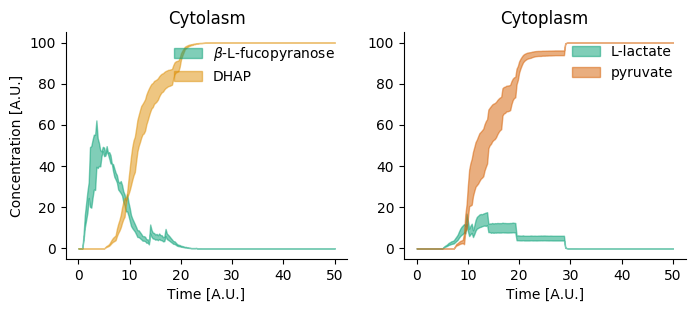

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

ax[0].fill_between(avrg.index, 
                   avrg['obs_beta_L_fucopyranose_cyt'] + stdv['obs_beta_L_fucopyranose_cyt'], 
                   avrg['obs_beta_L_fucopyranose_cyt'] - stdv['obs_beta_L_fucopyranose_cyt'], 
                   label = r'$\beta$-L-fucopyranose', **{'color' : palette[2], 'alpha' : 0.5})

ax[0].fill_between(avrg.index, 
                   avrg['obs_DIHYDROXY_ACETONE_PHOSPHATE_cyt'] + stdv['obs_DIHYDROXY_ACETONE_PHOSPHATE_cyt'], 
                   avrg['obs_DIHYDROXY_ACETONE_PHOSPHATE_cyt'] - stdv['obs_DIHYDROXY_ACETONE_PHOSPHATE_cyt'], 
                   label = r'DHAP', **{'color' : palette[1], 'alpha' : 0.5})

ax[1].fill_between(avrg.index, 
                   avrg['obs_L_LACTATE_cyt'] + stdv['obs_L_LACTATE_cyt'], 
                   avrg['obs_L_LACTATE_cyt'] - stdv['obs_L_LACTATE_cyt'], 
                   label = r'L-lactate', **{'color' : palette[2], 'alpha' : 0.5})

observable, label = ('obs_PYRUVATE_cyt', 'pyruvate')
ax[1].fill_between(avrg.index, 
                   avrg[observable] + stdv[observable], 
                   avrg[observable] - stdv[observable], 
                   label = label, **{'color' : palette[3], 'alpha' : 0.5})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].set_title('Cytolasm')
# ax[0].set_ylim(top = 200, bottom = 0)

ax[1].set_xlabel('Time [A.U.]')
ax[1].set_title('Cytoplasm')
# ax[1].set_ylim(top = 200, bottom = 0)

ax[0].legend(frameon = False)
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('model_fucose_stdv.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()